In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

In [2]:
df = pd.read_csv("predicted_and_validation_datasets_with_class.csv")

ahp = df.ahp
geophysics = df.geophysics
waterColumn = df.waterColumn

classes = [1,2,3,4,5]

In [3]:
df.isnull().sum()

waterColumn    0
ahp            0
geophysics     0
dtype: int64

In [4]:
# One-hot encode
waterColumn_bin = label_binarize(waterColumn, classes=classes)
geophysics_bin = label_binarize(geophysics, classes=classes)
ahp_bin = label_binarize(ahp, classes=classes)

In [5]:
# Calculate ROC curves
fpr1, tpr1, _ = roc_curve(waterColumn_bin.ravel(), geophysics_bin.ravel())
fpr2, tpr2, _ = roc_curve(waterColumn_bin.ravel(), ahp_bin.ravel())

In [6]:
# Calculate AUC
geophysics_auc = roc_auc_score(waterColumn_bin, geophysics_bin, average='macro')
ahp_auc = roc_auc_score(waterColumn_bin, ahp_bin, average='macro')

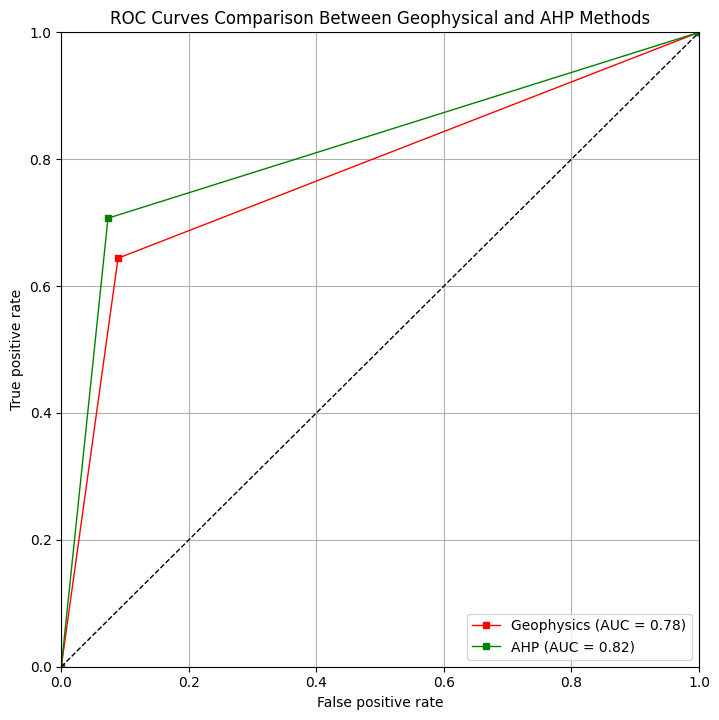

In [7]:
# Now plotting
plt.figure(figsize=(7,7))

# Plot each model with thinner lines and square markers
plt.plot(fpr1, tpr1, color='red', lw=1, marker='s', markersize=4, label=f'Geophysics (AUC = {geophysics_auc:.2f})')
plt.plot(fpr2, tpr2, color='green', lw=1, marker='s', markersize=4, label=f'AHP (AUC = {ahp_auc:.2f})')

# Diagonal line (black dashed)
plt.plot([0, 1], [0, 1], color='black', linestyle='--', lw=1)

# Labels
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curves Comparison Between Geophysical and AHP Methods')

# Legend
plt.legend(loc='lower right')

# Remove grid
plt.grid(True)

# Tight layout, no margins
plt.margins(0)
plt.tight_layout(pad=0)

# Show plot
plt.show()

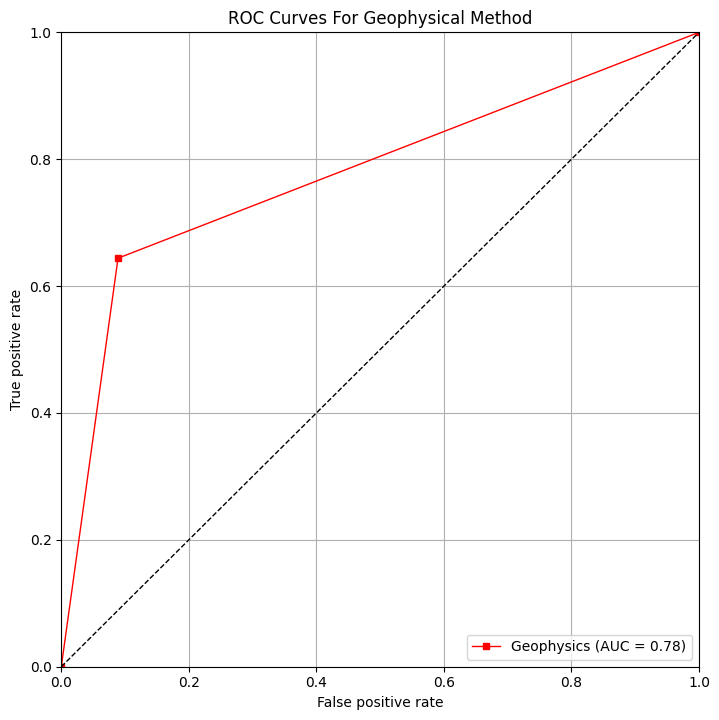

In [8]:
# GEOPHYSICS ROC CURVE
plt.figure(figsize=(7,7))

# Plot each model with thinner lines and square markers
plt.plot(fpr1, tpr1, color='red', lw=1, marker='s', markersize=4, label=f'Geophysics (AUC = {geophysics_auc:.2f})')

# Diagonal line (black dashed)
plt.plot([0, 1], [0, 1], color='black', linestyle='--', lw=1)

# Labels
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curves For Geophysical Method')

# Legend
plt.legend(loc='lower right')

# Remove grid
plt.grid(True)

# Tight layout, no margins
plt.margins(0)
plt.tight_layout(pad=0)

# Show plot
plt.show()

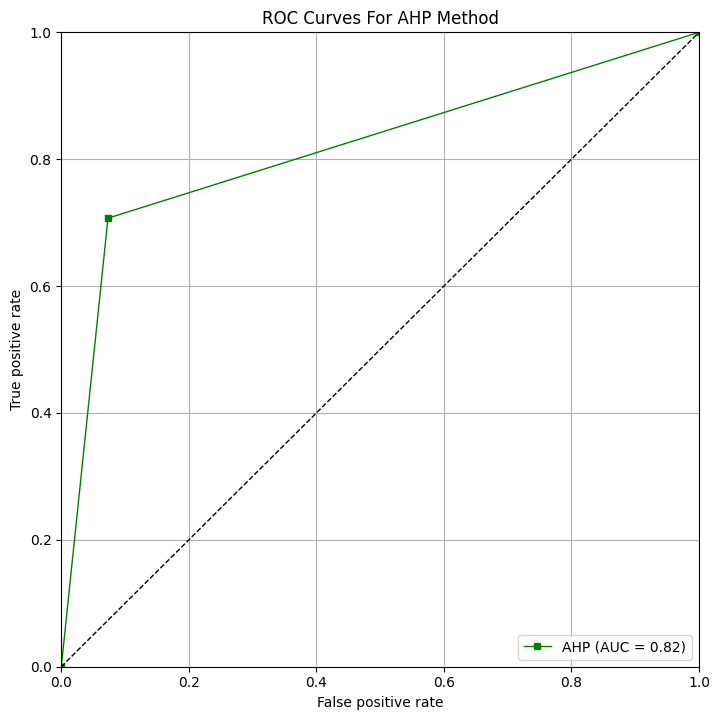

In [9]:
# AHP ROC CURVE
plt.figure(figsize=(7,7))

# Plot each model with thinner lines and square markers
plt.plot(fpr2, tpr2, color='green', lw=1, marker='s', markersize=4, label=f'AHP (AUC = {ahp_auc:.2f})')

# Diagonal line (black dashed)
plt.plot([0, 1], [0, 1], color='black', linestyle='--', lw=1)

# Labels
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curves For AHP Method')

# Legend
plt.legend(loc='lower right')

# Remove grid
plt.grid(True)

# Tight layout, no margins
plt.margins(0)
plt.tight_layout(pad=0)

# Show plot
plt.show()